<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [30]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [32]:
## Write your code here
print("Column names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nData shape:\n", df.shape) 
print("\nSummary information:\n", df.info())
print("\nSummary statistics:\n", df.describe()) 
print("\nSummary statistics include all:\n", df.describe(include= 'all'))

Column names:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncW

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [33]:
## Write your code here
missing_counts = df.isnull().sum() 
print(missing_counts.sort_values(ascending = False).head(20)) 

#Handle missing data on base of importance 
df_clean = df.dropna(subset =['JobSat']) 

thresold = 1000 
cols_to_drop =missing_counts[missing_counts > thresold].index 
df_clean = df_clean.drop(columns = cols_to_drop) 

#for Numeric column with missing values in moderate fill median 
numeric_cols = df_clean.select_dtypes(include =['float','int']).columns
for col in numeric_cols:
    df_clean[col] =df_clean[col].fillna(df_clean[col].median()) 

categorical_cols =df_clean.select_dtypes(include =['object']).columns 
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])  
print("\nPrint total missing values after clean:\n",df_clean.isnull().sum().sum())


AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
Knowledge_9                      37802
Frequency_3                      37727
Knowledge_8                      37679
ProfessionalTech                 37673
Knowledge_7                      37659
Knowledge_6                      37573
Knowledge_5                      37557
Knowledge_2                      37416
Knowledge_4                      37407
Knowledge_3                      37342
dtype: int64

Print total missing values after clean:
 0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [34]:
## Write your code here
Employment_dist = df['Employment'].value_counts(dropna = False) 
print("Employment distribution:\n", Employment_dist) 

jobsat_dist = df['JobSat'].value_counts(dropna=False)
print("\nJob Satisfaction Distribution:\n", jobsat_dist)

yearscodepro_dist = df['YearsCodePro'].value_counts(dropna = False)
print("\n Yearscodepro Distrbution: \n", yearscodepro_dist)

Employment distribution:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


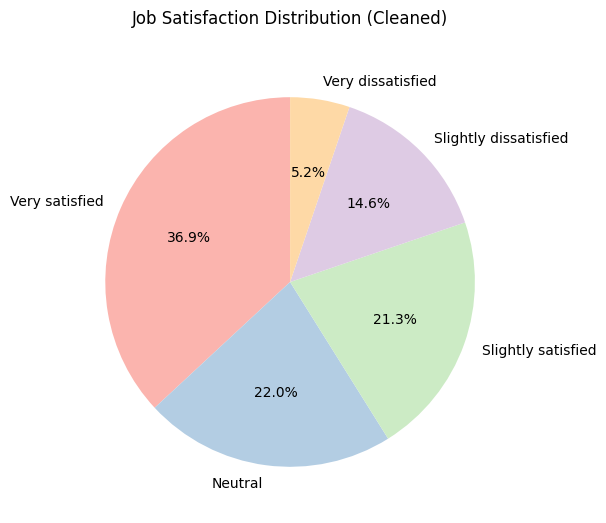

In [35]:
## Write your code here
# Map numeric values to labels (if needed)
df['JobSat'] = df['JobSat'].map({
    1: 'Very dissatisfied',
    2: 'Slightly dissatisfied',
    3: 'Neutral',
    4: 'Slightly satisfied',
    5: 'Very satisfied'
})
# Combine small categories into "Other"
job_sat_counts = df['JobSat'].value_counts()
small_categories = job_sat_counts[job_sat_counts < 100]  # Threshold example
df['JobSat'] = df['JobSat'].replace(small_categories.index, 'Other') 

job_sat_counts = df['JobSat'].value_counts(dropna=True)  # Exclude NaN

# Plot with adjusted labels
plt.figure(figsize=(10, 6))
plt.pie(
    job_sat_counts, 
    labels=job_sat_counts.index, 
    autopct='%1.1f%%',       # Format: 1 decimal place
    startangle=90,
    colors=plt.cm.Pastel1.colors  # Use a color map
)
plt.title('Job Satisfaction Distribution (Cleaned)', pad=20)
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


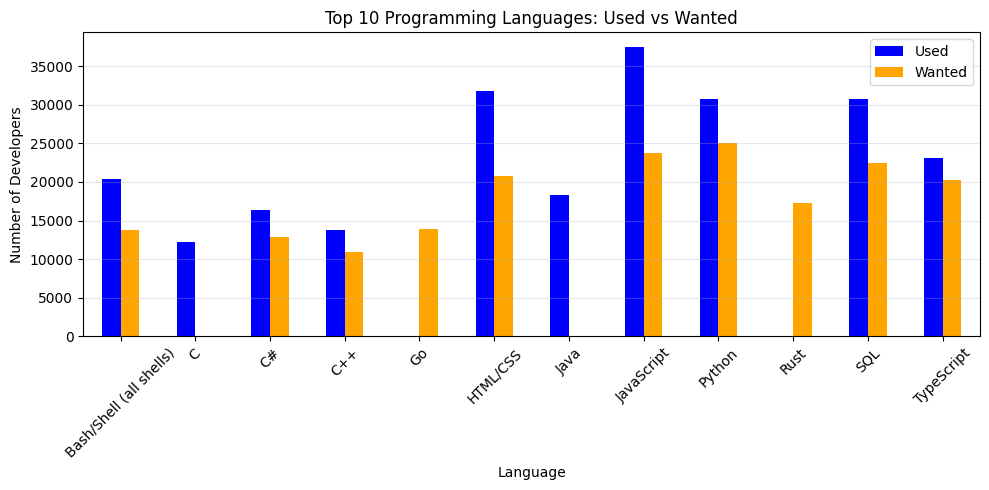

In [54]:
## Write your code here


# Step 1: Clean and count languages
worked = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10)
wanted = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10)

# Step 2: Combine into one DataFrame
combined = pd.DataFrame({'Used': worked, 'Wanted': wanted})

# Step 3: Plot simple bar chart
combined.plot(kind='bar', figsize=(10,5), color=['blue', 'orange'])
plt.title('Top 10 Programming Languages: Used vs Wanted')
plt.ylabel('Number of Developers')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x600 with 0 Axes>

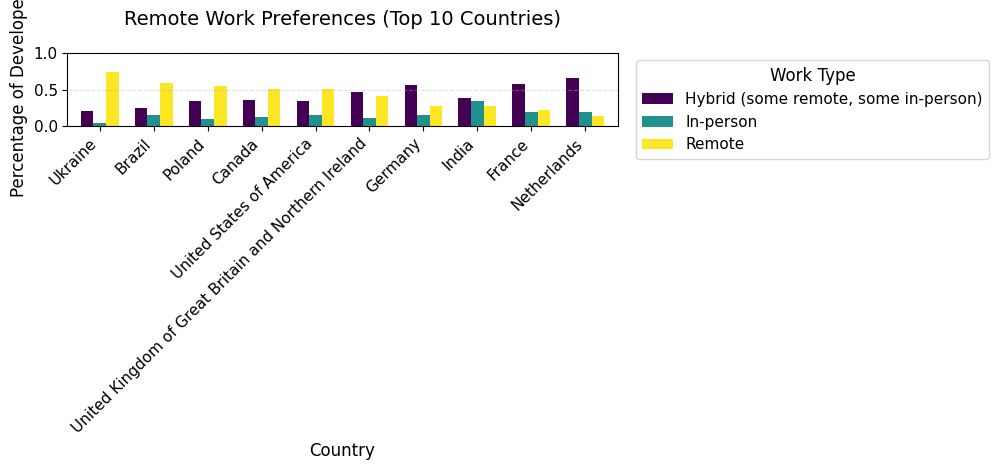

In [74]:
## Write your code here


# Simplify categories
df['RemoteWork'] = df['RemoteWork'].replace({
    'Fully remote': 'Remote',
    'Hybrid (some remote, some in-office)': 'Hybrid',
    'Full-time in-office': 'In-office'
})

# Get top 10 countries by response count
top_countries = df['Country'].value_counts().head(10).index

# Filter and create cross-tab
cross_tab = pd.crosstab(
    index=df[df['Country'].isin(top_countries)]['Country'],
    columns=df['RemoteWork'],
    normalize='index'
).sort_values('Remote', ascending=False)  # Sort by Remote percentage

# Plot
# Set more reasonable figure size (width, height)
plt.figure(figsize=(12, 6))  # Reduced from (20,15)

# Plot with proportional sizing
ax = cross_tab.plot(kind='bar', 
                   stacked=False,
                   colormap='viridis',
                   width=0.7)  # Slightly thinner bars

# Unified styling
plt.title('Remote Work Preferences (Top 10 Countries)', fontsize=14, pad=20)
plt.ylabel('Percentage of Developers', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 1)

# Improve legend
plt.legend(title='Work Type', 
          title_fontsize=12,
          fontsize=11,
          bbox_to_anchor=(1.02, 1))  # Move outside plot

# Custom grid
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [78]:
## Write your code here
!pip install scipy
import scipy.stats as stats

# Convert JobSat to numerical scale (1-5)
job_sat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(job_sat_map)

# Clean YearsCodePro (handle ranges and text)
def clean_years(y):
    if pd.isna(y):
        return None
    if y == 'Less than 1 year':
        return 0.5
    if y == 'More than 50 years':
        return 51
    # Extract first number from strings like "5-10 years"
    return float(''.join(filter(str.isdigit, str(y).split()[0])))

df['YearsCodePro_num'] = df['YearsCodePro'].apply(clean_years)

# Drop rows with missing values
clean_df = df[['JobSat_num', 'YearsCodePro_num']].dropna()
# Pearson correlation (linear relationship)
pearson_r, pearson_p = stats.pearsonr(clean_df['JobSat_num'], clean_df['YearsCodePro_num'])

# Spearman correlation (monotonic relationship)
spearman_r, spearman_p = stats.spearmanr(clean_df['JobSat_num'], clean_df['YearsCodePro_num'])

print(f"Pearson r = {pearson_r:.3f} (p-value = {pearson_p:.3f})")
print(f"Spearman ρ = {spearman_r:.3f} (p-value = {spearman_p:.3f})")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 163.0 MB/s eta 0:00:0000:01
Pearson r = -0.003 (p-value = 0.839)
Spearman ρ = 0.016 (p-value = 0.321)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment vs Education Level (Top 10 Employment Statuses):


EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",2.90,46.01,30.15,0.44,5.68,4.00,9.80,1.03
"Employed, full-time;Independent contractor, freelancer, or self-employed",3.11,41.27,28.78,0.75,4.75,5.41,14.70,1.23
"Employed, full-time;Student, full-time",3.74,37.73,21.42,0.50,3.61,13.20,18.93,0.87
"Employed, full-time;Student, part-time",4.68,41.95,20.13,0.26,2.86,7.53,21.30,1.30
"Employed, part-time",3.40,34.79,28.07,2.27,7.24,9.76,12.29,2.18
"Independent contractor, freelancer, or self-employed",3.15,35.11,29.58,1.26,5.27,8.09,16.06,1.48
"Not employed, but looking for work",3.48,46.22,18.19,2.40,3.01,9.40,14.90,2.40
"Student, full-time",1.91,21.59,5.63,9.83,0.87,40.45,17.19,2.52
"Student, full-time;Employed, part-time",2.90,33.01,7.24,2.51,0.68,28.86,23.84,0.97


/tmp/ipykernel_301/3590355669.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

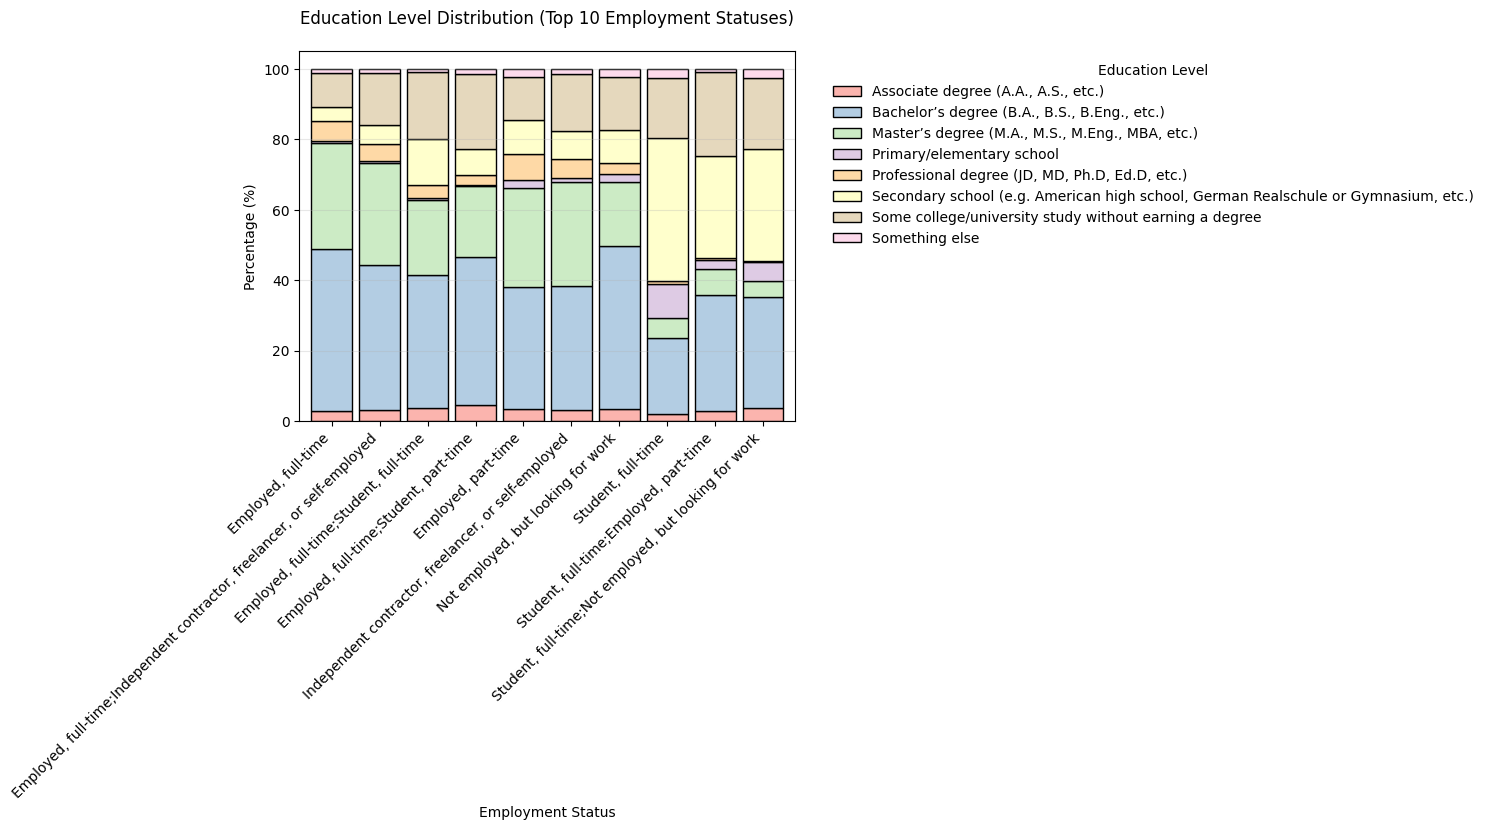

In [82]:
## Write your code here
# Get top 10 employment statuses by count
top_employment = df['Employment'].value_counts().head(10).index

# Filter data for only top 10 employment statuses
filtered_df = df[df['Employment'].isin(top_employment)]

# Create cross-tabulation
cross_tab = pd.crosstab(
    index=filtered_df['Employment'],
    columns=filtered_df['EdLevel'],
    normalize='index'
).round(4) * 100

print('Employment vs Education Level (Top 10 Employment Statuses):')
display(cross_tab)

# Plot settings
plt.figure(figsize=(12, 6))
colors = plt.cm.Pastel1.colors

# Create stacked bar plot
cross_tab.plot(kind='bar', 
               stacked=True,
               color=colors,
               edgecolor='black',
               width=0.85)

# Formatting
plt.title('Education Level Distribution (Top 10 Employment Statuses)', pad=20)
plt.ylabel('Percentage (%)')
plt.xlabel('Employment Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', 
           bbox_to_anchor=(1.05, 1),
           frameon=False)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout() j
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [84]:
## Write your code here
# Save the cleaned DataFrame to CSV
df.to_csv('cleaned_developer_survey.csv', index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
